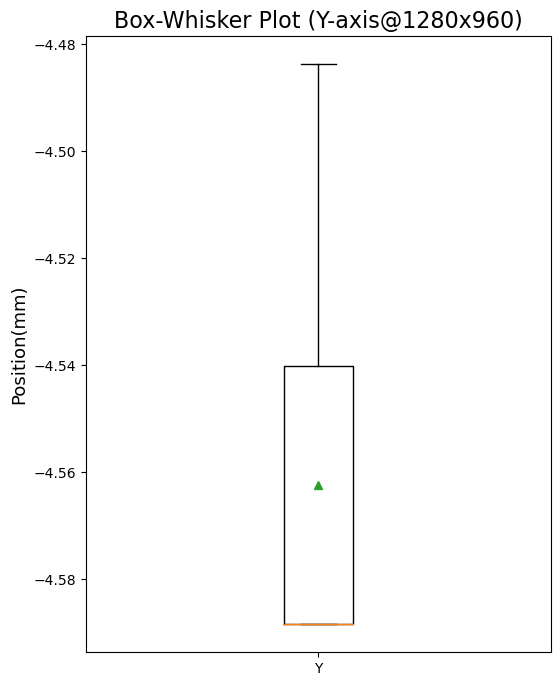

-4.562347944946287
0.03744902646465152


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

m_100_1280_data = pd.read_excel("./result/marker_position_100_1280.xlsx", header=0)
m_100_1600_data = pd.read_excel("./result/marker_position_100_1600.xlsx", header=0)
m_140_1280_data = pd.read_excel("./result/marker_position_140_1280.xlsx", header=0)
m_140_1600_data = pd.read_excel("./result/marker_position_140_1600.xlsx", header=0)

plt.figure()
plt.title("Box-Whisker Plot (Y-axis@1280x960)", fontsize=16)
plt.rcParams["figure.figsize"] = (6,8)
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 13
plt.ylabel("Position(mm)")
#plt.legend()
#plt.boxplot([m_100_1280_data['x'], m_100_1600_data['x']])
#plt.xticks([1, 2], ['X_1280', 'X_1600'])
plt.boxplot([m_140_1280_data['y']], showmeans=True)
plt.xticks([1], ['Y'])
plt.show()

print(m_140_1280_data['y'].mean())
print(m_140_1280_data['y'].std())

# print("X0 mean : {}".format(x_data['ID30-X0'].mean()))
# print("X1 mean : {}".format(x_data['ID30-X1'].mean()))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


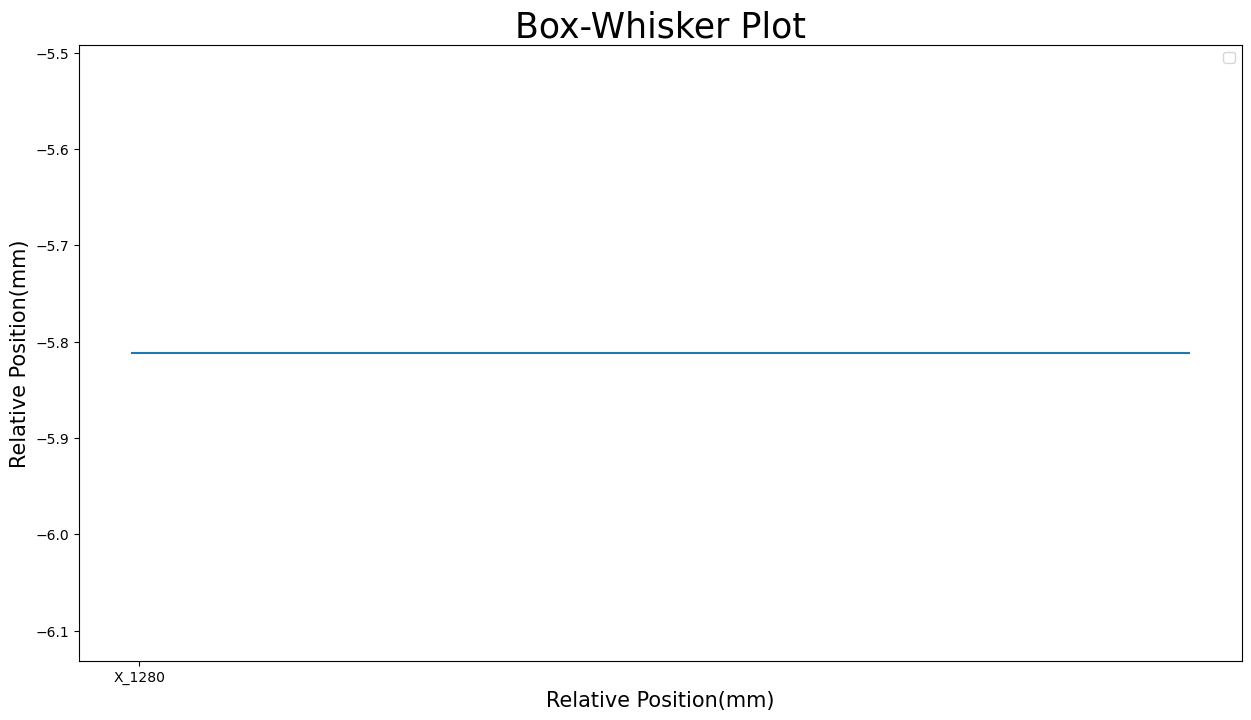

In [70]:
plt.figure()
plt.title("Box-Whisker Plot")
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.labelsize"] = 15
plt.ylabel("Relative Position(mm)")
plt.xlabel("Relative Position(mm)")
plt.legend()
#plt.boxplot([m_100_1280_data['x'], m_100_1600_data['x']])
#plt.xticks([1, 2], ['X_1280', 'X_1600'])
plt.plot(m_100_1280_data['x'])
plt.xticks([1], ['X_1280'])
plt.show()